<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.628038,0.199254,75.827292,75.632879,0.194413
1,0.0,1.0,33.226681,-0.135685,43.090995,43.230575,-0.139580
2,0.0,2.0,31.798629,-0.227606,41.571023,41.802481,-0.231459
3,0.0,3.0,22.572194,0.270127,32.842321,32.575778,0.266544
4,0.0,4.0,75.312691,0.089348,85.402039,85.317814,0.084225
...,...,...,...,...,...,...,...
249995,999.0,245.0,45.440689,0.081050,55.521739,55.464422,0.057317
249996,999.0,246.0,30.556671,-0.039179,40.517493,40.582151,-0.064659
249997,999.0,247.0,97.612392,-0.005946,107.606446,107.630001,-0.023555
249998,999.0,248.0,65.872490,-0.155500,75.716991,75.893825,-0.176834


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.628038,0.199254,75.827292,75.632879,0.194413
1,0.0,1.0,33.226681,-0.135685,43.090995,43.230575,-0.139580
2,0.0,2.0,31.798629,-0.227606,41.571023,41.802481,-0.231459
3,0.0,3.0,22.572194,0.270127,32.842321,32.575778,0.266544
4,0.0,4.0,75.312691,0.089348,85.402039,85.317814,0.084225
...,...,...,...,...,...,...,...
249995,999.0,245.0,45.440689,0.081050,55.521739,55.464422,0.057317
249996,999.0,246.0,30.556671,-0.039179,40.517493,40.582151,-0.064659
249997,999.0,247.0,97.612392,-0.005946,107.606446,107.630001,-0.023555
249998,999.0,248.0,65.872490,-0.155500,75.716991,75.893825,-0.176834


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.628038  0.199254   75.827292   75.632879  0.194413
      1.0    33.226681 -0.135685   43.090995   43.230575 -0.139580
      2.0    31.798629 -0.227606   41.571023   41.802481 -0.231459
      3.0    22.572194  0.270127   32.842321   32.575778  0.266544
      4.0    75.312691  0.089348   85.402039   85.317814  0.084225
...                ...       ...         ...         ...       ...
999.0 245.0  45.440689  0.081050   55.521739   55.464422  0.057317
      246.0  30.556671 -0.039179   40.517493   40.582151 -0.064659
      247.0  97.612392 -0.005946  107.606446  107.630001 -0.023555
      248.0  65.872490 -0.155500   75.716991   75.893825 -0.176834
      249.0  22.850516  0.393069   33.243585   32.876901  0.366685

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.628038  0.199254   75.827292   75.632879  0.194413
      1.0    33.226681 -0.135685   43.090995   43.230575 -0.139580
      2.0    31.798629 -0.227606   41.571023   41.802481 -0.231459
      3.0    22.572194  0.270127   32.842321   32.575778  0.266544
      4.0    75.312691  0.089348   85.402039   85.317814  0.084225
...                ...       ...         ...         ...       ...
999.0 245.0  45.440689  0.081050   55.521739   55.464422  0.057317
      246.0  30.556671 -0.039179   40.517493   40.582151 -0.064659
      247.0  97.612392 -0.005946  107.606446  107.630001 -0.023555
      248.0  65.872490 -0.155500   75.716991   75.893825 -0.176834
      249.0  22.850516  0.393069   33.243585   32.876901  0.366685

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,65.628038,0.199254,75.827292,75.632879,0.194413
1,0.0,1.0,33.226681,-0.135685,43.090995,43.230575,-0.139580
2,0.0,2.0,31.798629,-0.227606,41.571023,41.802481,-0.231459
3,0.0,3.0,22.572194,0.270127,32.842321,32.575778,0.266544
4,0.0,4.0,75.312691,0.089348,85.402039,85.317814,0.084225
...,...,...,...,...,...,...,...
249995,999.0,245.0,45.440689,0.081050,55.521739,55.464422,0.057317
249996,999.0,246.0,30.556671,-0.039179,40.517493,40.582151,-0.064659
249997,999.0,247.0,97.612392,-0.005946,107.606446,107.630001,-0.023555
249998,999.0,248.0,65.872490,-0.155500,75.716991,75.893825,-0.176834


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    65.628038  0.199254   75.827292   75.632879  0.194413
      1.0    33.226681 -0.135685   43.090995   43.230575 -0.139580
      2.0    31.798629 -0.227606   41.571023   41.802481 -0.231459
      3.0    22.572194  0.270127   32.842321   32.575778  0.266544
      4.0    75.312691  0.089348   85.402039   85.317814  0.084225
...                ...       ...         ...         ...       ...
999.0 245.0  45.440689  0.081050   55.521739   55.464422  0.057317
      246.0  30.556671 -0.039179   40.517493   40.582151 -0.064659
      247.0  97.612392 -0.005946  107.606446  107.630001 -0.023555
      248.0  65.872490 -0.155500   75.716991   75.893825 -0.176834
      249.0  22.850516  0.393069   33.243585   32.876901  0.366685

[250000 rows x 5 columns]

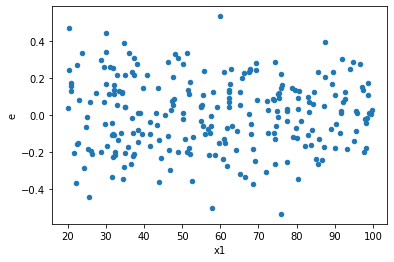

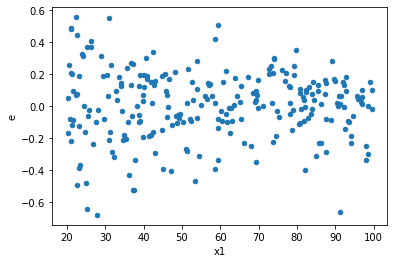

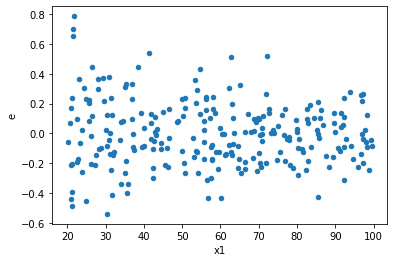

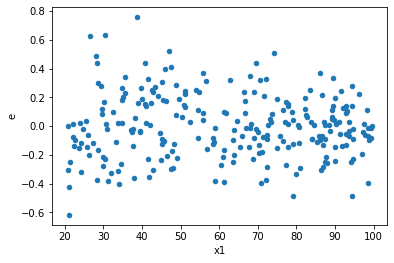

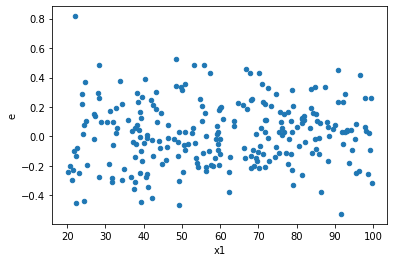

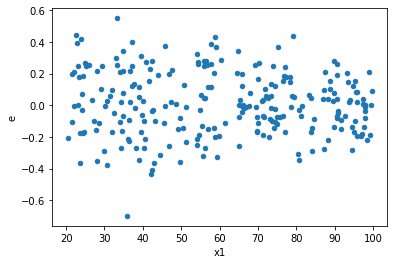

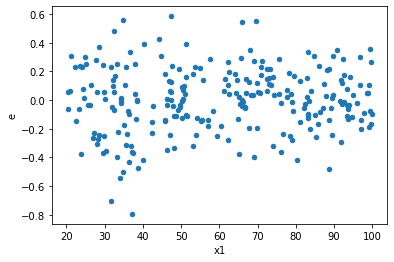

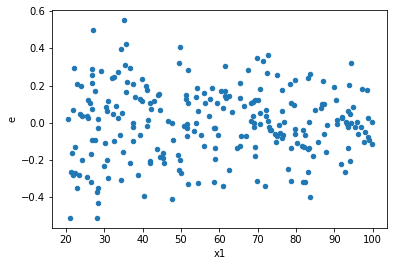

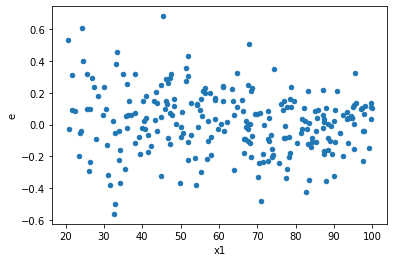

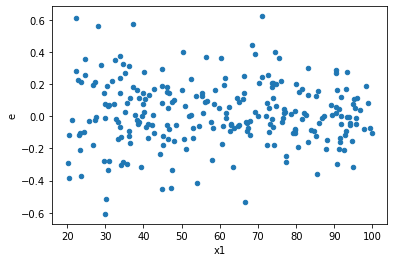

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,4.287847218032666,3.059200195269408,0.04331158806093602,0.030901012073428363,0.7134583019665096,0.0946200943134751,Reject001=1 : Homoscedasticity
1.0,99.0,99.0,6.926323630903162,2.907114556761416,0.0699628649586178,0.029364793502640565,0.4197197115928499,2.2012815795336942e-05,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,6.578251395756242,2.5869603060694506,0.0664469837955176,0.026130912182519703,0.393259568604865,5.329710489790637e-06,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,6.3647515759603355,3.1937109769631644,0.06429041995919531,0.03225970683801176,0.5017809318789141,0.0007012691249767113,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,5.843024835580809,3.499283639821362,0.059020452884654635,0.03534629939213497,0.5988822122597611,0.011390832623286605,Reject001=1 : Homoscedasticity
5.0,99.0,99.0,5.390812091523459,2.2944755125662883,0.05445264738912585,0.023176520328952406,0.42562706204768913,2.9528383381772552e-05,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,6.895733473466179,3.58800409022203,0.06965387346935534,0.03624246555779828,0.5203223274258162,0.0013095450038418416,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,5.2590101195124355,2.518068820263279,0.05312131433850945,0.02543503858851797,0.4788104154659299,0.0003008378692253519,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,5.307245236415551,2.260384656393721,0.053608537741571226,0.022832168246401222,0.4259054473089239,2.9934143574632257e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    832
Reject001=1 : Homoscedasticity      168
Name: Result_test, dtype: int64